Ganesh K 212219040033

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip' -d '/content/drive/MyDrive/FlowerDataset/'

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
  inflating: /content/drive/MyDrive/FlowerDataset/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/drive/MyDrive/FlowerDataset/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: /content/drive/MyDrive/FlowerDataset/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: /content/drive/MyDrive/FlowerDataset/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: /content/drive/MyDrive/FlowerDataset/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: /content/drive/MyDrive/FlowerDataset/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/drive/MyDrive/FlowerDataset/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: /content/drive/MyDrive/FlowerDataset/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/drive/MyDrive/FlowerDataset/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: /content/drive/MyDrive/FlowerDataset/flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflatin

In [ ]:
my_data_dir = '/content/drive/MyDrive/FlowerDataset'

In [ ]:
X=[]
l=[]
img_dim=150
daisy_dir='/content/drive/MyDrive/FlowerDataset/flowers/daisy'
sun_dir='/content/drive/MyDrive/FlowerDataset/flowers/sunflower'
tulip_dir='/content/drive/MyDrive/FlowerDataset/flowers/tulip'
dandi_dir='/content/drive/MyDrive/FlowerDataset/flowers/dandelion'
rose_dir='/content/drive/MyDrive/FlowerDataset/flowers/rose'

In [ ]:
def assign_label(img,flower_type):
    return flower_type
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (img_dim,img_dim))
        
        X.append(np.array(img))
        l.append(str(label))

In [ ]:
make_train_data('Daisy',daisy_dir)
make_train_data('Sunflower',sun_dir)
make_train_data('Tulip',tulip_dir)
make_train_data('Dandelion',dandi_dir)
make_train_data('Rose',rose_dir)

100%|██████████| 784/784 [00:13<00:00, 57.36it/s] 


In [ ]:
le=LabelEncoder()
y=le.fit_transform(l)
y=to_categorical(y,5)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=32)

In [ ]:
augment = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.2, 
        height_shift_range=0.2, 
        horizontal_flip=True, 
        vertical_flip=False) 


augment.fit(x_train)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dense(5, activation = "softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
History = model.fit(augment.flow(x_train,y_train, batch_size=128),
                              epochs = 50, validation_data = (x_test,y_test))



Epoch 1/50
24/24 [==============================] - 25s 644ms/step - loss: 1.5318 - accuracy: 0.2943 - val_loss: 1.3372 - val_accuracy: 0.3711
Epoch 2/50
24/24 [==============================] - 14s 597ms/step - loss: 1.2458 - accuracy: 0.4611 - val_loss: 1.1881 - val_accuracy: 0.4938
Epoch 3/50
24/24 [==============================] - 14s 597ms/step - loss: 1.1157 - accuracy: 0.5323 - val_loss: 1.0638 - val_accuracy: 0.5733
Epoch 4/50
24/24 [==============================] - 14s 591ms/step - loss: 1.0218 - accuracy: 0.5965 - val_loss: 1.0030 - val_accuracy: 0.5980
Epoch 5/50
24/24 [==============================] - 14s 599ms/step - loss: 0.9711 - accuracy: 0.6283 - val_loss: 0.9197 - val_accuracy: 0.6420
Epoch 6/50
24/24 [==============================] - 14s 591ms/step - loss: 0.9147 - accuracy: 0.6508 - val_loss: 0.9007 - val_accuracy: 0.6474
Epoch 7/50
24/24 [==============================] - 14s 593ms/step - loss: 0.8485 - accuracy: 0.6806 - val_loss: 0.9368 - val_accuracy: 0.6373

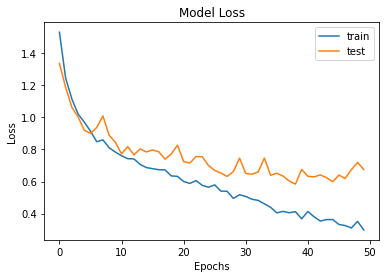

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [ ]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break


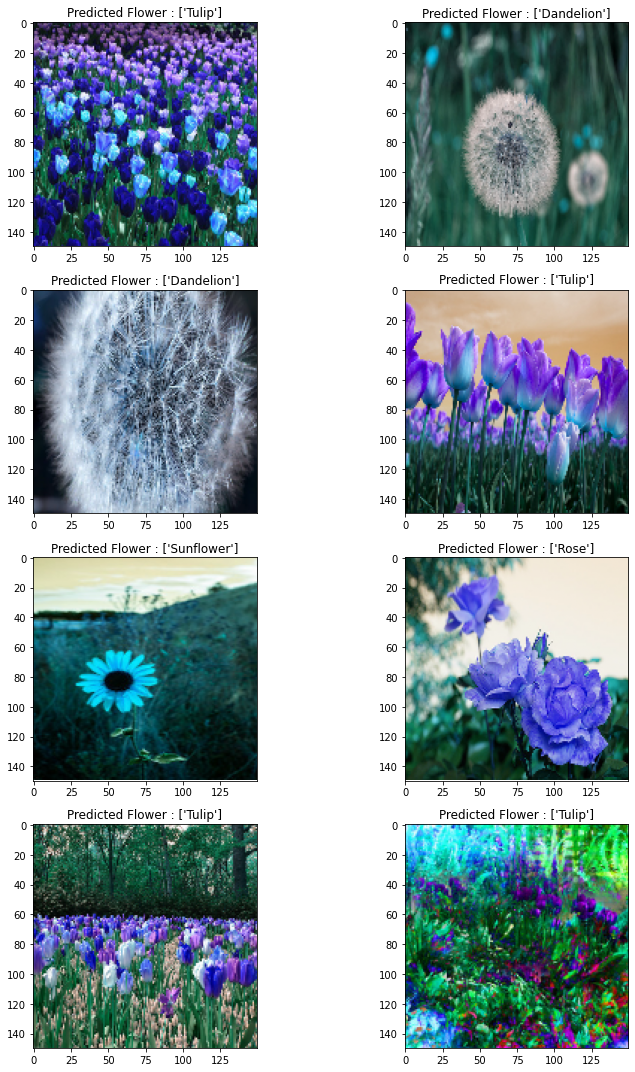

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]])))
        plt.tight_layout()
        count+=1